In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.random.seed(42)
# 배기량
cc = np.random.randint(1000, 3500, size=50)
# 랜덤 오차 ( 평균 0, 표준편차 1 )
epsilon = np.random.normal(0, 1, size=50)

In [3]:
# 가중치
w = 0.0037
# 편향
b = 0.0
# 연비
l = w * cc + b + epsilon

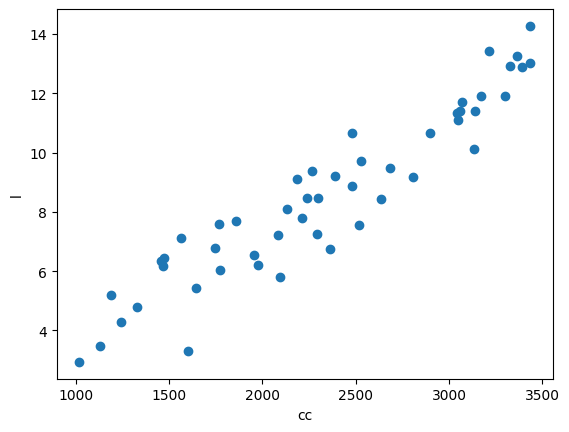

In [4]:
plt.scatter(cc, l)
plt.xlabel('cc')
plt.ylabel('l')
plt.show()

#### 학습률이 너무 높으면 overshooting이 일어남

In [5]:
class LR_model:
    def __init__(self):
        np.random.seed(42)
        self.weight = np.random.randn(1)
        self.bias = np.random.randn(1)
        
    def prediction(self, x):
        return self.weight * x + self.bias
    
    def fit(self, x, y):
        # a = 학습률, epoch = 반복 학습 수
        a = 1e-3
        epoch = 3000
        n = x.size
        
        for i in range(epoch):
            dw = 2 / n * np.sum(x * (self.prediction(x) - y))
            db = 2 / n * np.sum((self.prediction(x) - y))
            current_loss = np.mean((self.prediction(x) - y) ** 2)
            self.weight = self.weight - a * dw
            self.bias = self.bias - a * db
            if i % 100 == 0:
                print(i, current_loss)

In [6]:
model = LR_model()
model.fit(cc, l)
pred = model.prediction(cc)

0 1447445.0453439078
100 nan
200 nan
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan
1100 nan
1200 nan
1300 nan
1400 nan
1500 nan
1600 nan
1700 nan
1800 nan
1900 nan
2000 nan
2100 nan
2200 nan
2300 nan
2400 nan
2500 nan
2600 nan
2700 nan
2800 nan
2900 nan


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\user\AppData\Local\Temp\ipykernel_30572\772192427.py:19: RuntimeWarning: overflow encountered in square
  current_loss = np.mean((self.prediction(x) - y) ** 2)
C:\Users\user\AppData\Local\Temp\ipykernel_30572\772192427.py:17: RuntimeWarning: overflow encountered in multiply
  dw = 2 / n * np.sum(x * (self.prediction(x) - y))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_30572\772192427.py:20: RuntimeWarning: invalid value encountered in subtract
  self.weight = self.weight - a * dw


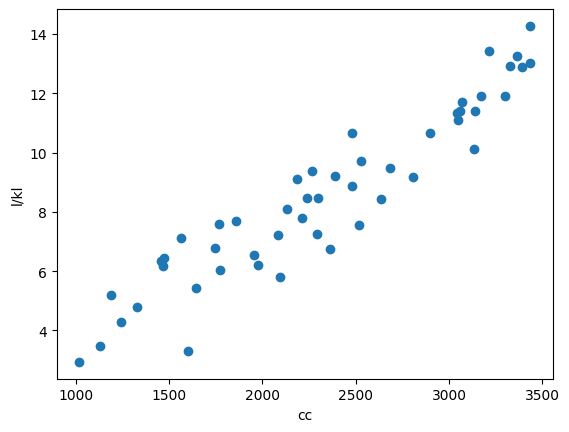

In [7]:
plt.scatter(cc, l)
plt.plot(cc, pred, color='red')
plt.xlabel('cc')
plt.ylabel('l/kl')
plt.show()

In [8]:
minmax_scaler_x = MinMaxScaler()
minmax_scaler_y = MinMaxScaler()

cc = cc.reshape(-1, 1)
l = l.reshape(-1, 1)

X_scaled_minmax = minmax_scaler_x.fit_transform(cc)
Y_scaled_minmax = minmax_scaler_y.fit_transform(l)

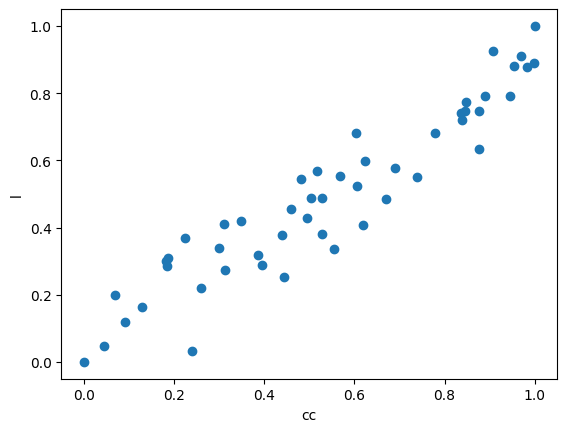

In [9]:
plt.scatter(X_scaled_minmax, Y_scaled_minmax)
plt.xlabel('cc')
plt.ylabel('l')
plt.show()

0 0.14926073824722552
100 0.09179450176810931
200 0.05787725343754145
300 0.03785107645295256
400 0.026019158111073023
500 0.019021175115774912
600 0.014875001538786578
700 0.01241145255179932
800 0.010940863466860216
900 0.010056418696518568
1000 0.009518143753214617
1100 0.009184476990737555
1200 0.008971906639061217
1300 0.00883116237817969
1400 0.008733171739971768
1500 0.008660776372512453
1600 0.00860384580569691
1700 0.008556395260473764
1800 0.008514885559460082
1900 0.008477220309706568
2000 0.008442154377190697
2100 0.008408944965184186
2200 0.008377145794604985
2300 0.008346485694361291
2400 0.008316796981740447
2500 0.008287973211985527
2600 0.008259944251649583
2700 0.008232661570642565
2800 0.008206089561976146
2900 0.008180200417111778


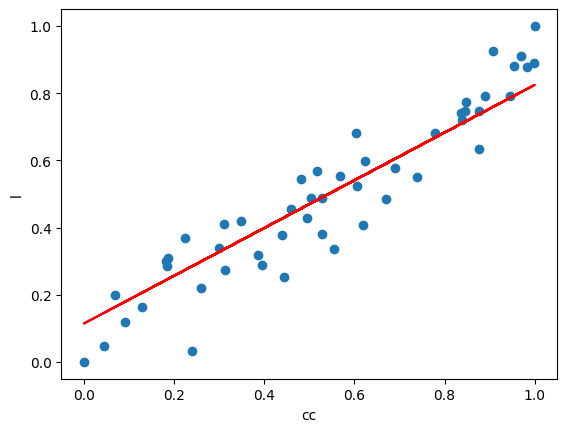

In [11]:
model2= LR_model()
model2.fit(X_scaled_minmax, Y_scaled_minmax)
pred = model2.prediction(X_scaled_minmax)

plt.scatter(X_scaled_minmax, Y_scaled_minmax)
plt.plot(X_scaled_minmax, pred, color='red')
plt.xlabel('cc')
plt.ylabel('l')
plt.show()